# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [129]:
#Pandas allows us to organize our dataset inside a dataframe while numpy allows us to use high-level mathematical functions.
import pandas as pd
import numpy as np

#For Data Visualization, let's import Seaborn and Matplotlib. Matplotlib allows us to plot using Python.

import matplotlib.pyplot as plt

#Seaborn is a high-level visualization library that sits on top of matplotlib.
import seaborn as sns

#We will use Scikit-learn to build model. Let's import all the useful algorithms we will need from this library.

#We will use LinearRegression model from scikit-learn to predict the price
from sklearn.linear_model import LinearRegression

#train_test_split will allow us to split our dataset into training and testing sets.
from sklearn.model_selection import train_test_split

#These metrics will help in model performance checking.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Loading the dataset

In [130]:
# Using the Pandas library, we can read in our data and store it inside the variable `df` 

df = pd.read_csv('used_device_data.csv')

In [131]:
#Let's have a quick glance at the first 10 rows of data.
df.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


In [132]:
#We can check for the number of rows and columns inside the dataset using the `shape` method.
df.shape

(3454, 15)

As shown above, this dataset has 3454 rows and 15 columns.

## Data Overview

- Observations
- Sanity checks

In [133]:
#The `info()` method prints information about a DataFrame such as the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- Four columns are categorical while the other nine are all having numerical values.
- The categorical data types include the columns 4g, 5g, brand_name, and os.
- The numerical data types include all the other columns.
- We can observe that column 5, 6, 7, 8, 9 have missing values.
- The memory usage is 404.9+ KB
- normalized_used_price will be our dependent variable.

In [134]:
#Let's use `describe()` method to return a description of the data. It doesn't include all columns.
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [135]:
# When we add "all", it means that all columns of the input will be included in the output.
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- The phones in the dataset has 4 unique operating systems. Android operating system tops the list as the most popular os with 3214 phones using it.
- The dataset has 34 different phone manufacturing brands.
- The number of phones with 4g signal is 2335 while those with 5g is only 152.df = data.copy()df = data.copy()

In [136]:
#Lets create a copy of the dataframe. It is good practice to do so to avoid making changes to the original dataframe.
df1 = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [137]:
# Let's create a function to label barplots

def custom_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # captures the length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  

### 1. Distribution of normalized used and new devices

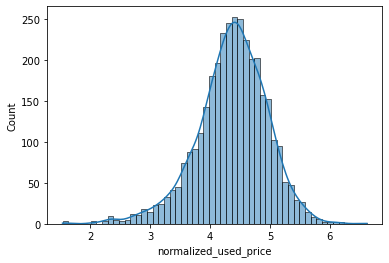

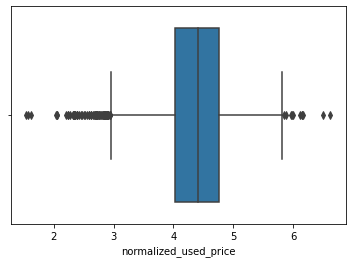

In [138]:
#Distribution of normalized used price
sns.histplot(data=df1,x='normalized_used_price',kde=True)
plt.show()
sns.boxplot(data=df1,x='normalized_used_price')
plt.show()

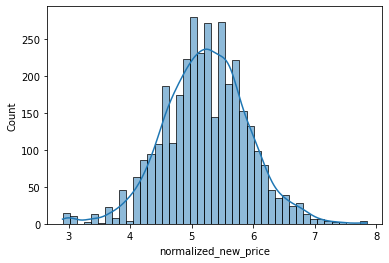

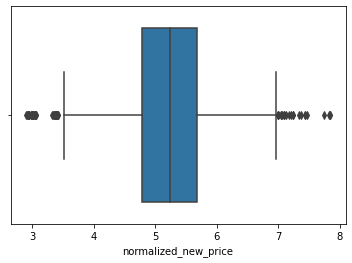

In [139]:
sns.histplot(data=df1,x='normalized_new_price',kde=True)
plt.show()
sns.boxplot(data=df1,x='normalized_new_price')
plt.show()

### 2. Percentage of used devices dominated by Android

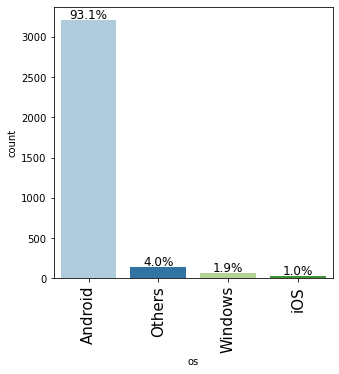

In [140]:
custom_barplot(df1, "os", perc=True)

Android os dominates the used device market by 93.1%

### 3. Amount of RAM important for smooth functioning

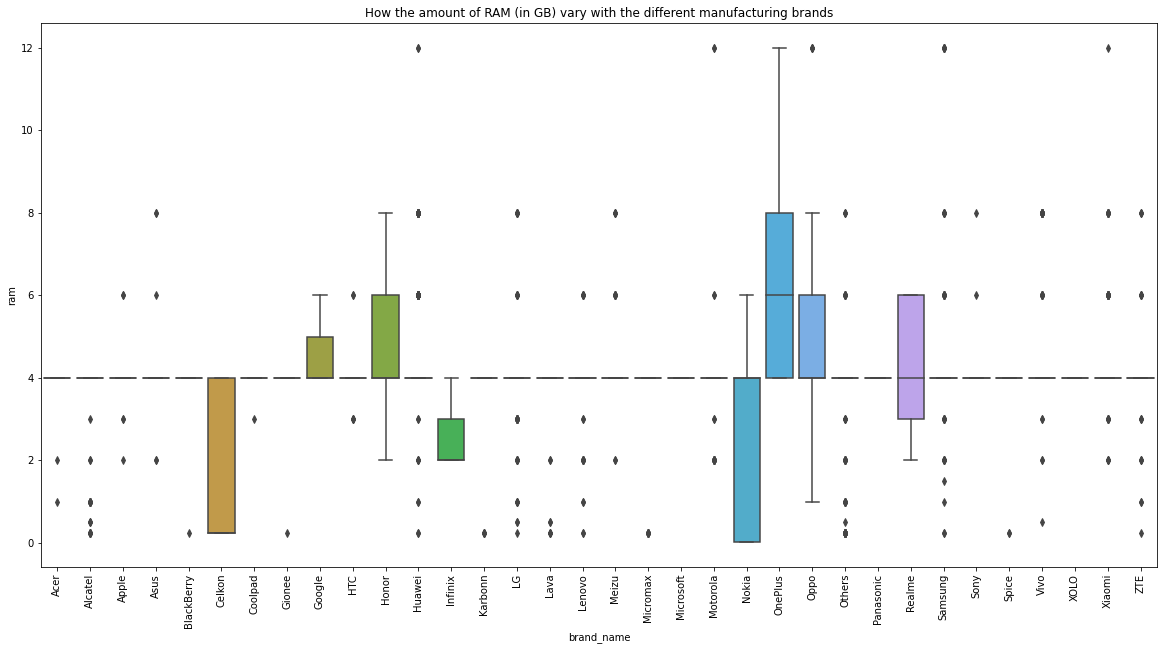

In [141]:
plt.figure(figsize=(20,10))

sns.boxplot(data = df1.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.title("How the amount of RAM (in GB) vary with the different manufacturing brands")
plt.show()

The minimum (25%, 50%, 75%) and maximum RAM (in GB) for several manufacturing brands are the same i.e. 4GB indicating little variance (spread). However, there are still outliers present (very high or very low RAM (in GB))

### 4. How weight varies for phones and tablets offering large batteries

In [142]:
df_weightvsbattery = df1[df1["battery"]>4500]

In [143]:
df_weightvsbattery.shape

(341, 15)

The dataset has 341 used phones with batteries more than 4500 mAH

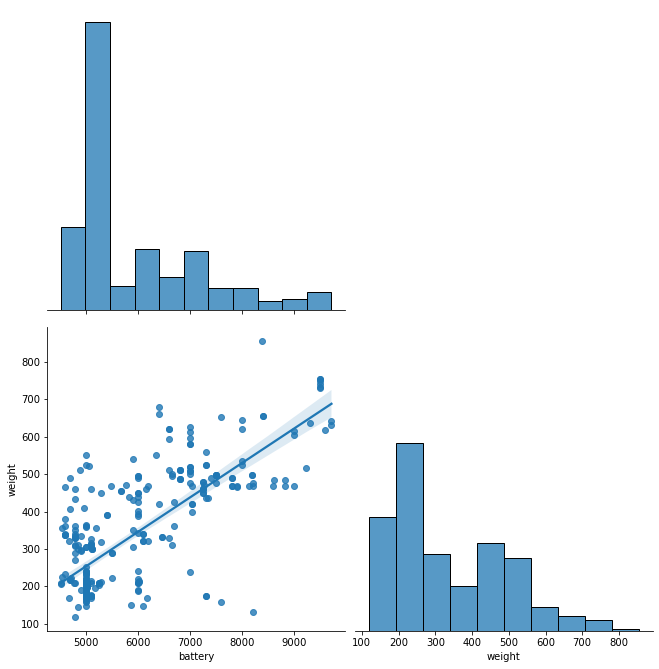

The linear correlation factor between weight and battery is: 0.76


In [144]:
z = sns.pairplot(data = df_weightvsbattery[["battery","weight"]], corner=True, kind="reg")
z.fig.set_size_inches(10,10)
plt.show()
print("The linear correlation factor between weight and battery is:", \
      round(df_weightvsbattery.corr()["weight"]["battery"] , 2))

From this correlation results betweeen the phone's weight and battery, we can clearly conclude that the phone's weight increases with an increase in the battery. 

### 5. Phones and tablets are available across different brands with a screen size larger than 6 inches 

In [145]:
# We need to convert the inches to centimetres. 6 inches is equivalent to 15.24cm
df_ls = df1[df1["screen_size"]>15.24]

In [146]:
df_ls.shape

(1099, 15)

1099 phones and tablets are available across different brands with a screen size larger than 6 inches

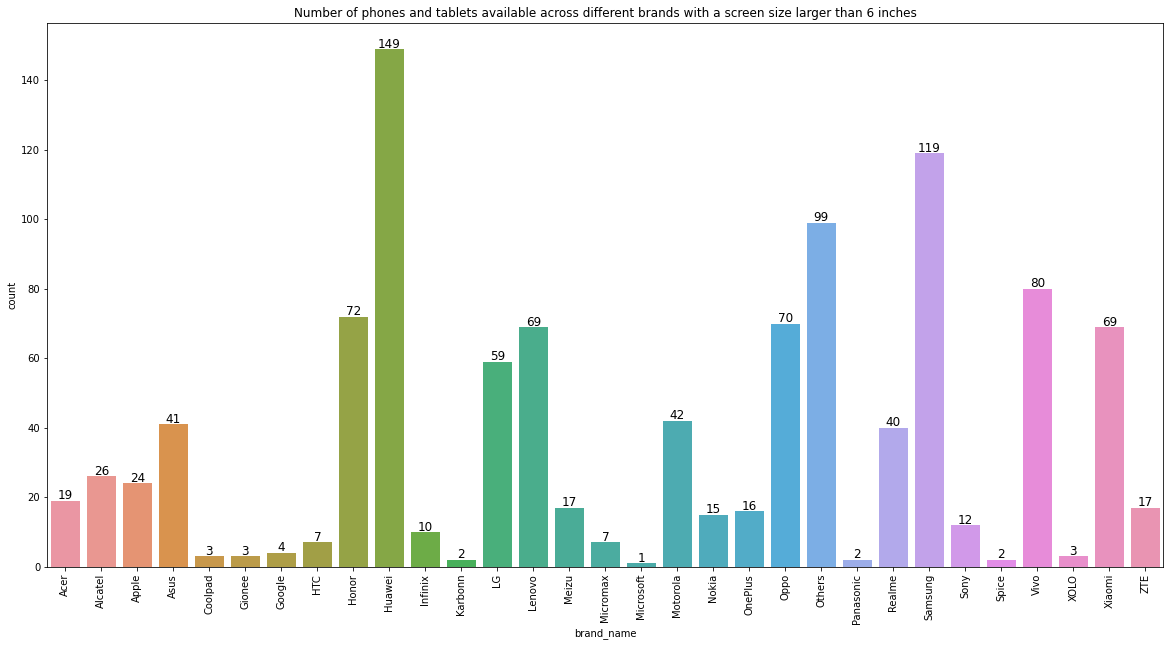

In [147]:
plt.figure(figsize=(20,10))

ax = sns.countplot(data = df_ls.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of phones and tablets available across different brands with a screen size larger than 6 inches")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

- From these results, we can see that Huawei, Samsung, Vivo, Honor, Oppo, and Lenovo are the top six used phones with screen sizes of more than 6 inches. Huawei tops with 149, followed by 119, 80, 72, 70, and 69 for Samsung, Vivo, Honor, Oppo, and Lenovo respectively.
- Coolpad, Google, HTC, Microsoft, Panasonic, and Gionee and the brand names with the least number of used phones with screen sizes of more than 6 inches.

### 6. Distribution of devices offering greater than 8MP selfie cameras across brands

In [148]:
df_bestselfie = df1[df1["selfie_camera_mp"]>8]

In [149]:
df_bestselfie.shape

(655, 15)

A total of 655 used phones from different manufacturing brands offer great selfie cameras with more than 8MP.

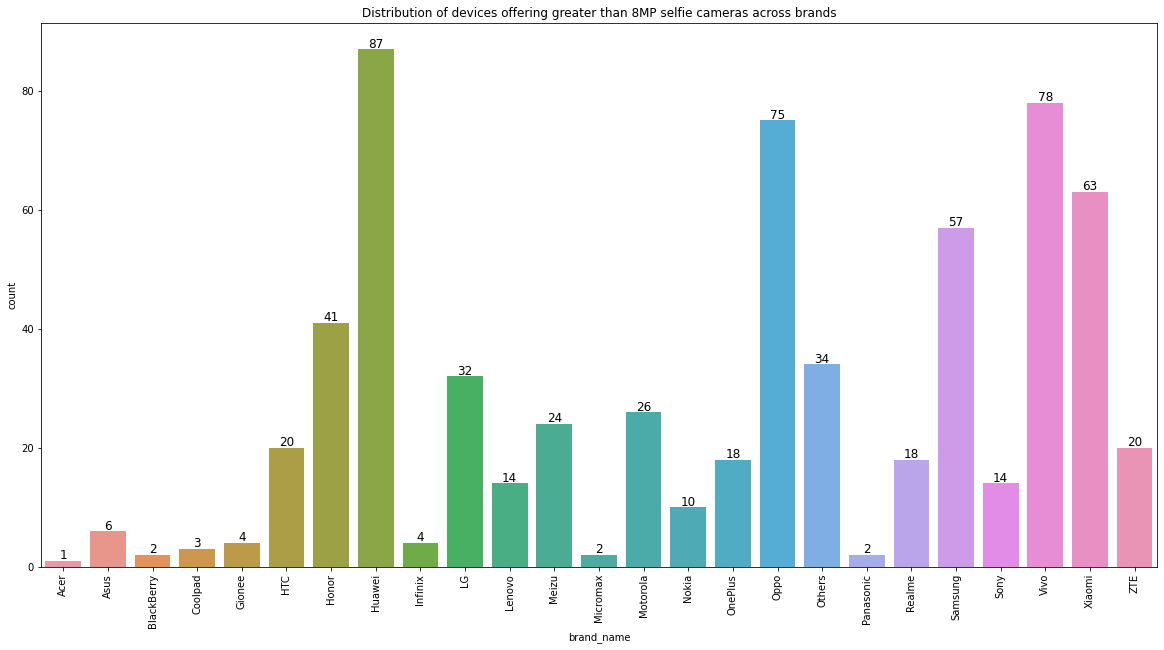

In [150]:
plt.figure(figsize=(20,10))

ax = sns.countplot(data = df_bestselfie.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Distribution of devices offering greater than 8MP selfie cameras across brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

- Huawei leads the manufacturing brands with 87 used phones with selfie cameras greater than 8MP. It is followed closely with Vivo (78), Oppo (78), and Xiaomi (63).
- Acer (1), Blackberry (2), and Panasonic (3) are the used phones with the least number of phones with selfie cameras greater than 8MP.

### 7. Attributes highly correlated with the normalized price of a used device

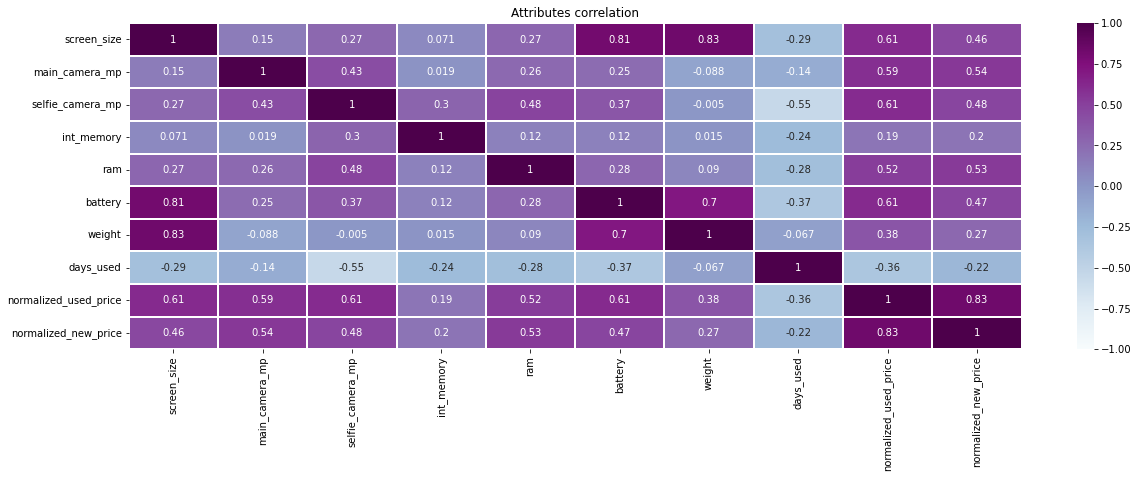

In [151]:
num_attributes = df1.select_dtypes(include=np.number).columns.to_list()

#Lets remove the release_year column as we don't need it. It is a temporal variable
num_attributes.remove("release_year") 

plt.figure(figsize=(20,6))
sns.heatmap(df1[num_attributes].corr(), annot=True, vmin=-1, vmax=1, cmap="BuPu", linewidths=0.05).set_title('Attributes correlation');

- Attributes that are positively correlated with the normalized price include the screen_size, main_camera_mp, selfie_camera_mp, ram and the battery.
- normalized_used_price is highly correlated with normalized_new_price which means the higher the new price the higher the used price tends to increase.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [152]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [153]:
df1["brand_name"].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [154]:
df1.select_dtypes(include = np.number).columns.to_list()

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [155]:
medianFiller = lambda x:x.fillna(x.median())

brand_names = df1["brand_name"].unique()
num_col = df1.select_dtypes(include = np.number).columns.to_list()


for item in brand_names:
    df1.loc[df1.brand_name==item, num_col] = \
    df1.loc[df1.brand_name==item, num_col].apply(medianFiller, axis=0)

In [156]:
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [157]:
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(0)

In [158]:
#Rechecking missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

We have removed all the missing values.

- We will now drop the "RAM" column as majority of dataset has a constant RAM of 4GB with negligible upper and lower outliers.

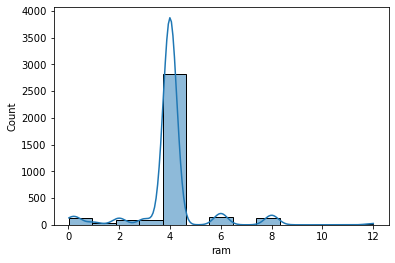

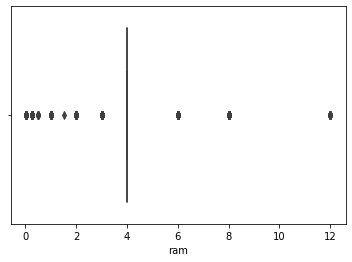

In [159]:
sns.histplot(data=df1,x='ram',kde=True)
plt.show()
sns.boxplot(data=df1,x='ram')
plt.show()

In [160]:
df1.drop("ram", axis=1, inplace=True)

In [161]:
num_col.remove("ram")
num_col.remove("normalized_new_price")
num_col.remove("normalized_used_price")

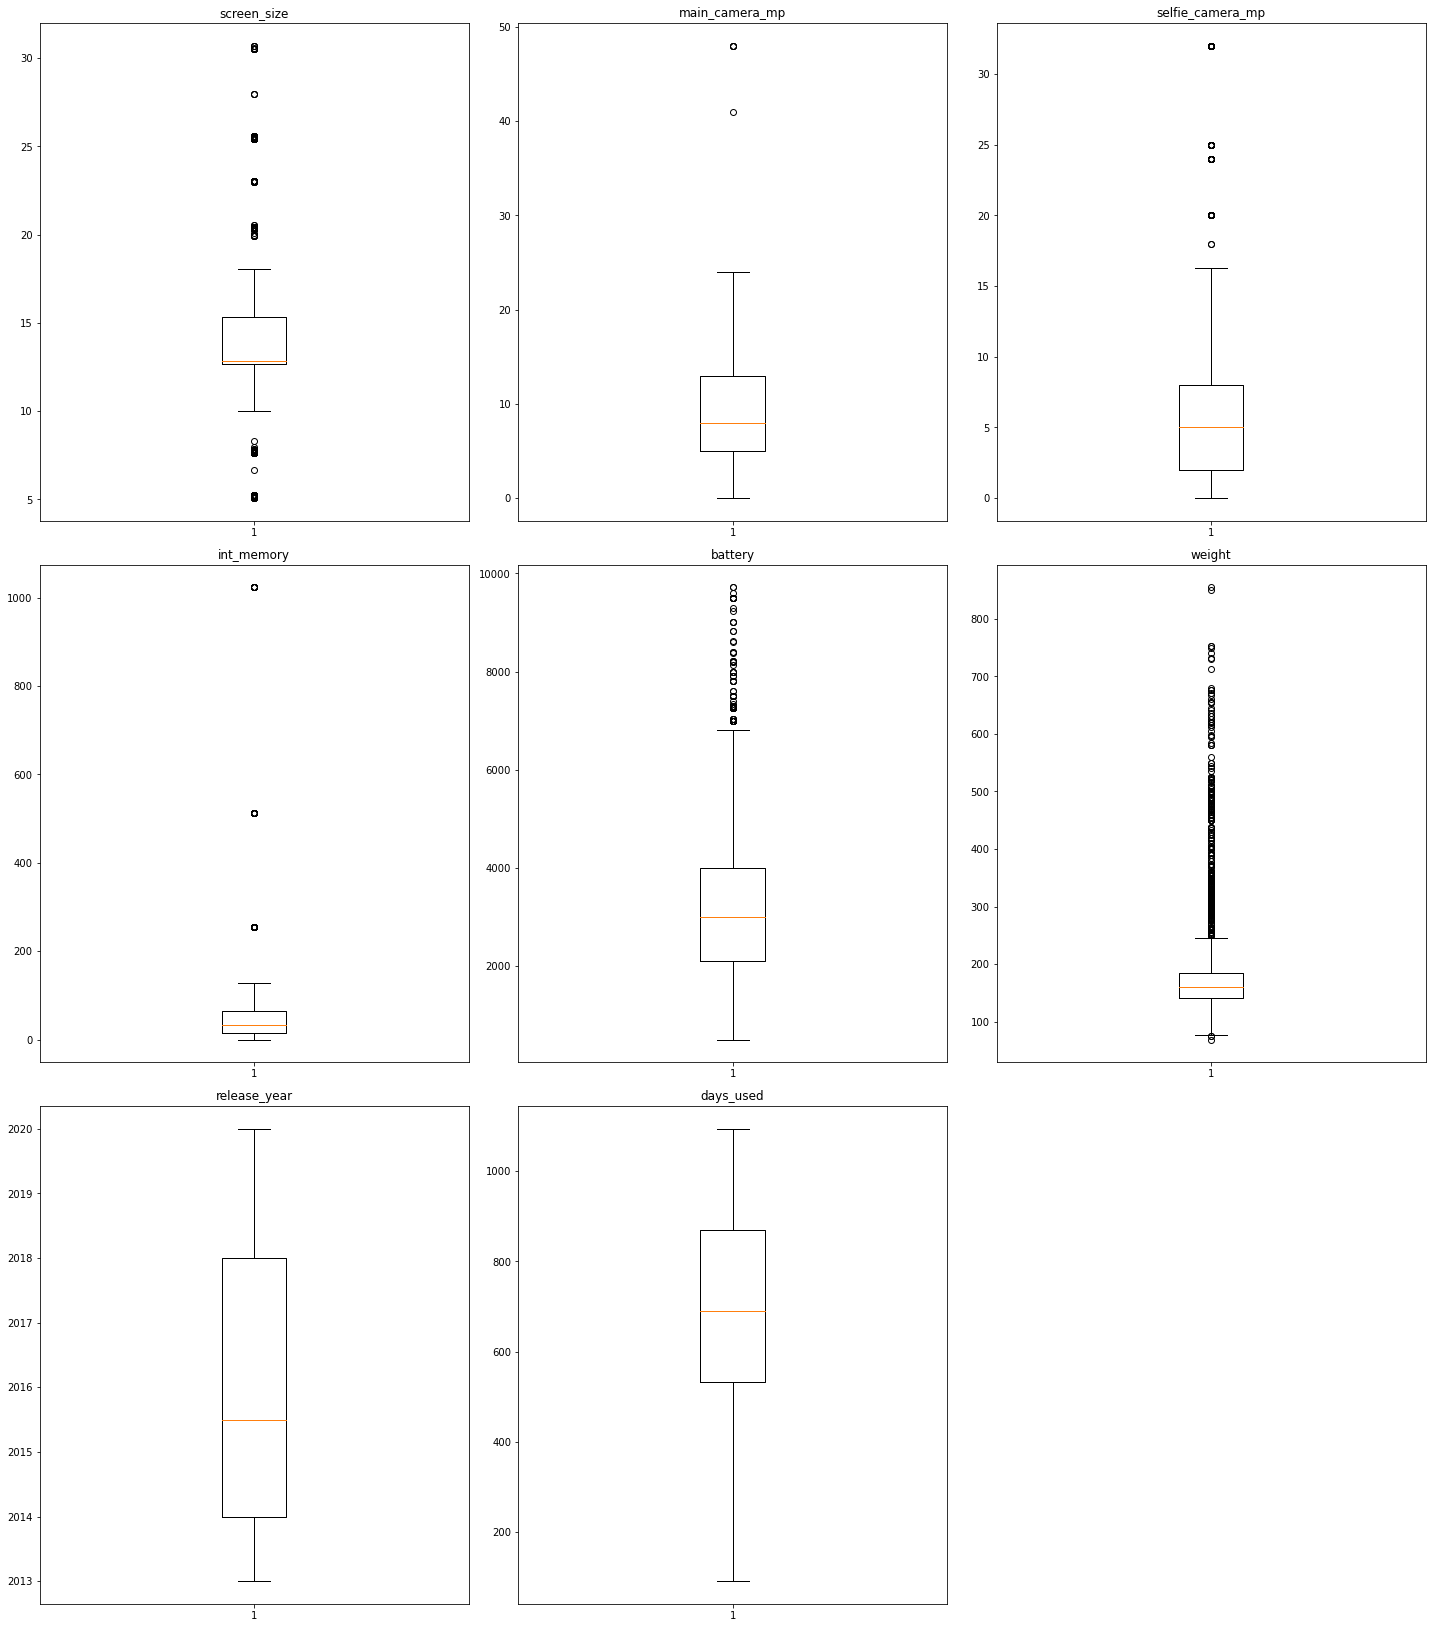

In [162]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_col):
    plt.subplot(4,3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We dont have outliers in the days_used and release_year columns
- We have both lower and upper outliers in the weight and screen_size column.
- The selfie_camera_mp, battery, int_memory, and main_camera_mp have a few upper outliers.

We will perform a technique known as flooring and capping to remove these outliers. Thereafter, build our model

In [163]:
def treat_outliers(df1, col):
 
    Q1 = df1[col].quantile(0.25)  # 25th quantile
    Q3 = df1[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    df1[col] = np.clip(df1[col], Lower_Whisker, Upper_Whisker)

    return df1


def treat_outliers_all(df1, col_list):
   
    for c in col_list:
        df1 = treat_outliers(df1, c)

    return df1

In [164]:
# Let's apply the function to treat the outliers
num_col = df1.select_dtypes(include=np.number).columns.tolist()
df1 = treat_outliers_all(df1, num_col)

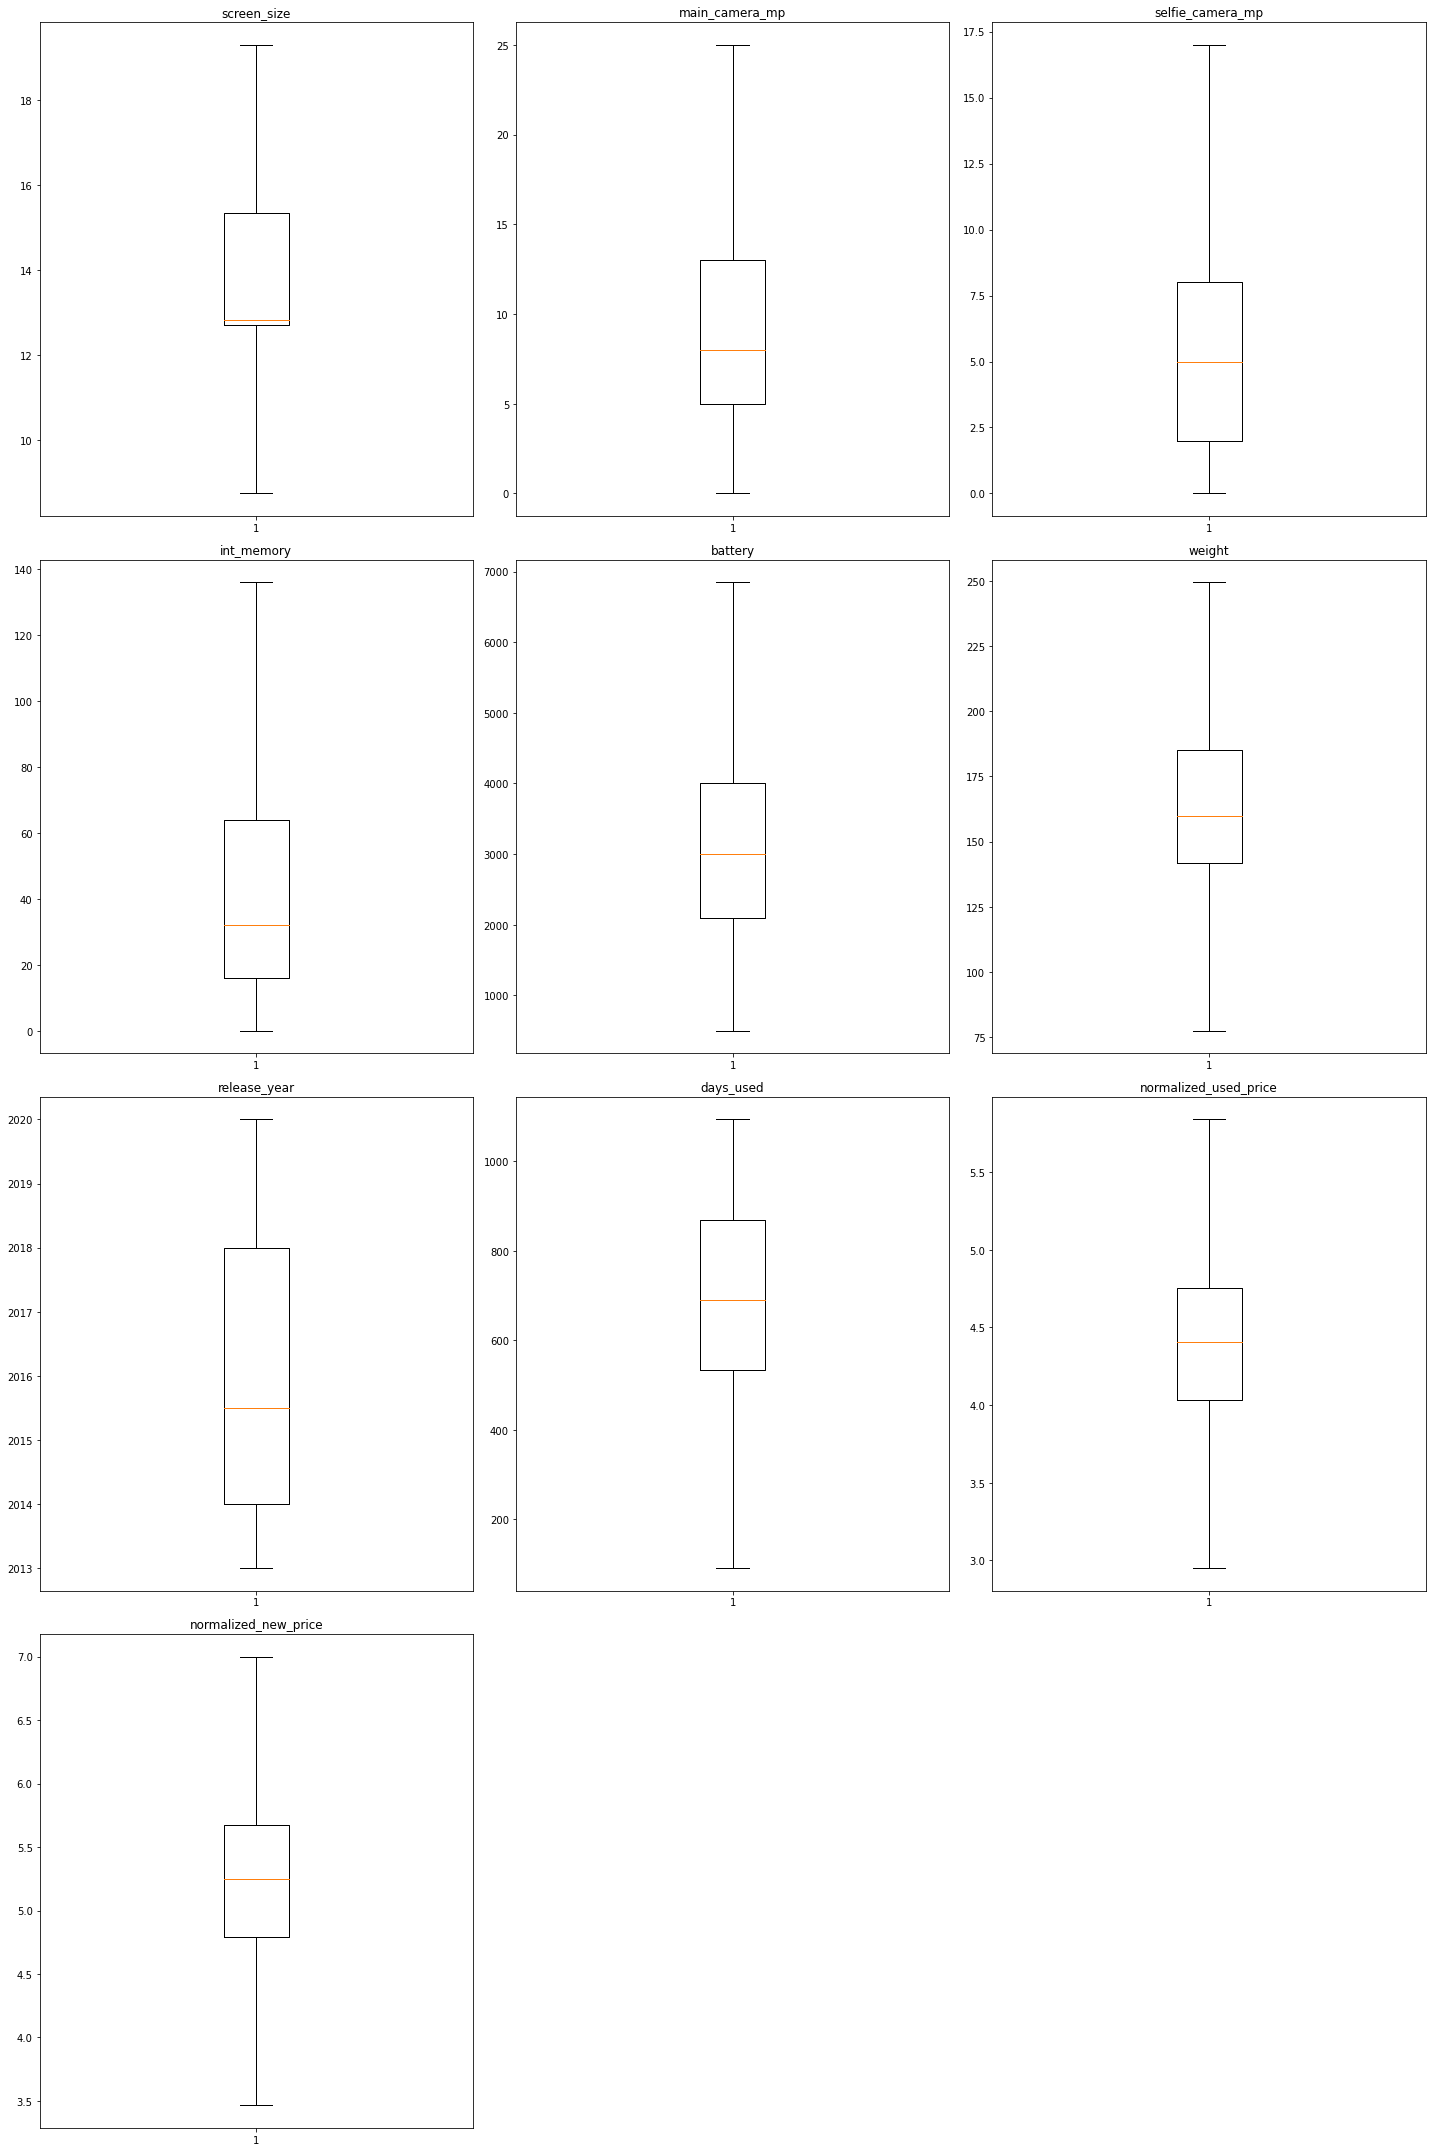

In [165]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_col):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We have successfully treated the outliers and removed them.

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Reanalyzing the linear correlation between the weight and battery of over 4500 mah

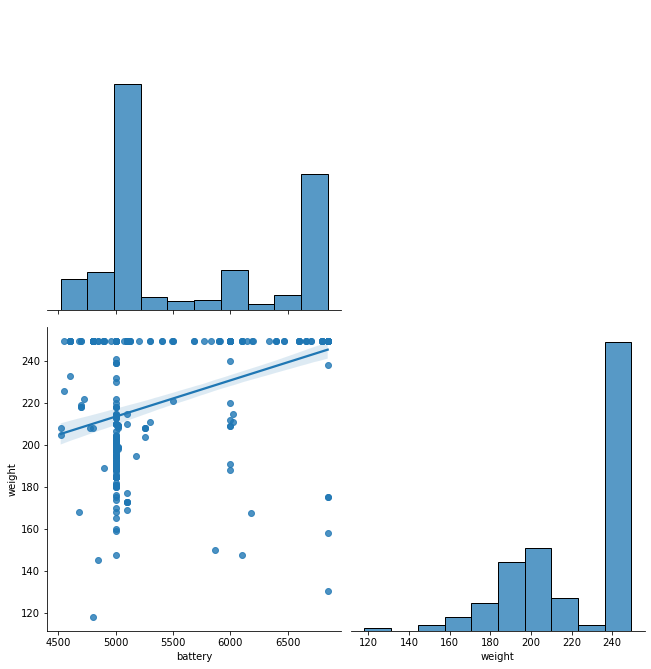

The linear correlation factor between weight and battery is: 0.48


In [166]:
df_weightvsbattery = df1[df1["battery"]>4500]

z = sns.pairplot(data = df_weightvsbattery[["battery","weight"]], corner=True, kind="reg")
z.fig.set_size_inches(10,10)
plt.show()
print("The linear correlation factor between weight and battery is:", \
      round(df_weightvsbattery.corr()["weight"]["battery"] , 2))

The linear correlation factor has reduced from 0.76 to 0.48 after we've treated the outliers. This indicates that the correlation has become weaker. 

### Reanalyzing the attributes highly correlated with the normalized price of a used device

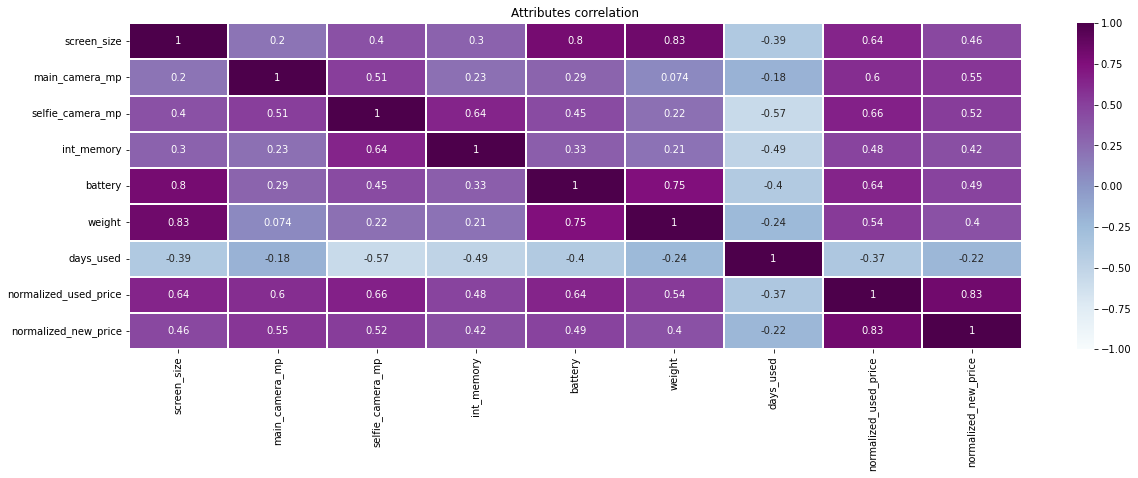

In [167]:
num_attributes = df1.select_dtypes(include=np.number).columns.to_list()

#Lets remove the release_year column as we don't need it. It is a temporal variable
num_attributes.remove("release_year") 

plt.figure(figsize=(20,6))
sns.heatmap(df1[num_attributes].corr(), annot=True, vmin=-1, vmax=1, cmap="BuPu", linewidths=0.05).set_title('Attributes correlation');

Attributes that were positively correlated with the normalized price have increased their values after outliers have been treated. 

## Model Building - Linear Regression

In [168]:
# We begin by defining our X and y variables
X = df1.drop(["normalized_used_price", "release_year"], axis=1) 
y = df1["normalized_used_price"]

In [169]:
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3020.0,146.0,127,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,4300.0,213.0,325,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,4200.0,213.0,162,5.884631
3,Honor,Android,19.30,yes,yes,13.0,8.0,64.0,6850.0,249.5,345,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,5000.0,185.0,293,4.947837


In [170]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [171]:
#Before we proceed to build a model, we'll have to encode categorical features.

X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), \
    drop_first=True)

print(X.shape)
X.head()

(3454, 46)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,brand_name_Alcatel,brand_name_Apple,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3020.0,146.0,127,4.715100,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4300.0,213.0,325,5.519018,0,0,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4200.0,213.0,162,5.884631,0,0,...,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,6850.0,249.5,345,5.630961,0,0,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,5000.0,185.0,293,4.947837,0,0,...,0,0,0,0,0,0,0,0,1,0


We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [172]:
# Using scikit-learn `train_test_split` lets split the data into 70:30 ratio. 

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("Total number of rows present in train data =", x_train.shape[0])
print("Total number of rows present in test data =", x_test.shape[0])

Total number of rows present in train data = 2417
Total number of rows present in test data = 1037


In [173]:
# Lets now fit the model on the train data. We save the model inside the variable `lr`.

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [174]:
#Let's check the coefficients and intercept of the model
coefficient_df = pd.DataFrame(np.append(lr.coef_, lr.intercept_), \
                       index = x_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])
coefficient_df

,Coefficients
screen_size,0.045172
main_camera_mp,0.022691
selfie_camera_mp,0.017037
int_memory,0.000629
battery,0.000011
weight,0.001124
days_used,0.000010
normalized_new_price,0.379907
brand_name_Alcatel,-0.072724
brand_name_Apple,0.280745


## Model Performance Check

- For evaluation, we will use the metrics available on sklern: mean_squared_error, mean_absolute_error, r2_score.
- But first, we need to create a function to compute different metrics to check regression model performance

In [175]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
  
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # computes the R-squared score
    adjr2 = adj_r2_score(predictors, target, pred)  # computes the adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # computes Root Mean Squared Error
    mae = mean_absolute_error(target, pred)  # computes the Mean Absolute Error
    mape = mape_score(target, pred)  # computes the Mean Absolute Percentage Error

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [176]:
# Let's check the model performance on train set
print("Training Performance\n")
lr_train_perf = model_performance_regression(lr, x_train, y_train)
lr_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.222867,0.176081,0.844282,0.84126,4.135178


In [177]:
# Let's check the model performance on test set
print("Test Performance\n")
lr_test_perf = model_performance_regression(
    lr, x_test, y_test
)
lr_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.225685,0.180888,0.836612,0.82902,4.219544


- The MAPE on the test set suggests we can predict within 4.2% of the normalized_used_price.
- The model is able to explain approximately 84% of the variation in the data, which is very good.

### Linear Regression using statsmodels

In [178]:
import statsmodels.api as sm

x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     279.3
Date:                   Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                           13:30:45   Log-Likelihood:                 198.78
No. Observations:                   2417   AIC:                            -303.6
Df Residuals:                       2370   BIC:                            -31.41
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


/home/willies/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the multicollinearity.

#### TEST FOR MULTICOLLINEARITY
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

- VIF of 1-5 : low multicollinearity
- VIF of 5-10 : moderate multicollinearity
- VIF of > 10 : high multicollinearity

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def check_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Let's calculate VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 2)
        for i in range(len(predictors.columns))
    ]
    return vif

In [181]:
check_vif(x_train1)

,feature,VIF
0,const,237.40
1,screen_size,5.42
2,main_camera_mp,2.55
3,selfie_camera_mp,3.36
4,int_memory,2.33
5,battery,3.73
6,weight,4.66
7,days_used,1.90
8,normalized_new_price,2.96
9,brand_name_Alcatel,3.46


The normalized_new_price of a used phone has VIF of 2.96

Let's remove multicollinearity of VIF above 5

In [182]:
# Let's define a function that will help us do this.

def treating_multicollinearity(predictors, target, high_vif_columns):
 
    # Create an empty list to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # We define the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # Let's create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # Let's create a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [183]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Huawei",
    "brand_name_LG",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.841302,0.225037
1,brand_name_LG,0.841256,0.225069
2,brand_name_Huawei,0.841255,0.225070
3,brand_name_Others,0.841219,0.225095
4,os_iOS,0.841132,0.225157
5,brand_name_Apple,0.841063,0.225205


In [184]:
# Let's drop brand_name_Huawei

col_to_drop = "brand_name_Huawei"
X_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
X_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = check_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,166.41
1,screen_size,5.42
2,main_camera_mp,2.55
3,selfie_camera_mp,3.36
4,int_memory,2.32
5,battery,3.73
6,weight,4.65
7,days_used,1.90
8,normalized_new_price,2.96
9,brand_name_Alcatel,1.41


VIF for brand_name_Apple and os_iOS is still high.

In [185]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.841125,0.225161
1,brand_name_Apple,0.840950,0.225285


In [187]:
#Let's drop the brand name Apple

col_to_drop = "brand_name_Apple"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = check_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,165.17
1,screen_size,5.42
2,main_camera_mp,2.55
3,selfie_camera_mp,3.33
4,int_memory,2.32
5,battery,3.72
6,weight,4.65
7,days_used,1.89
8,normalized_new_price,2.92
9,brand_name_Alcatel,1.40


The above predictors have no multicollinearity and the assumption is satisfied

### Model Performance

In [188]:
#Let's now check the model performance
olsmod1 = sm.OLS(y_train, X_train3).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     291.3
Date:                   Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                           13:36:42   Log-Likelihood:                 195.40
No. Observations:                   2417   AIC:                            -300.8
Df Residuals:                       2372   BIC:                            -40.24
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [189]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# Loop to check for p-values of the variables and drop the column with the highest p-value.
while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols  # variables with p-values lesser than 0.05
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'weight', 'normalized_new_price', 'brand_name_Asus', 'brand_name_Celkon', 'brand_name_Infinix', 'brand_name_Microsoft', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [190]:
# We only use the variables with p-values less than 0.05 to train model

X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

In [191]:
olsmod2 = sm.OLS(y_train, X_train4).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     989.8
Date:                   Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                           13:37:09   Log-Likelihood:                 186.05
No. Observations:                   2417   AIC:                            -344.1
Df Residuals:                       2403   BIC:                            -263.0
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [192]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.257266,0.004709
3141,4.175156,3.823937,0.351219
1233,4.117410,4.465073,-0.347663
3046,3.782597,3.833754,-0.051157
2649,3.981922,3.936636,0.045286


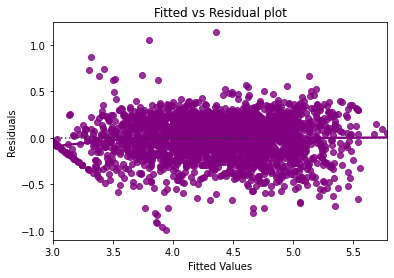

In [193]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

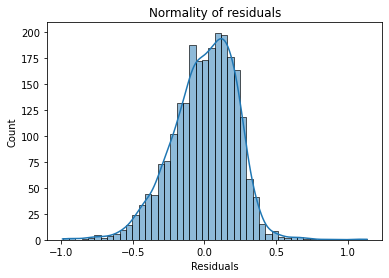

In [194]:
# histogram plot of the residual
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

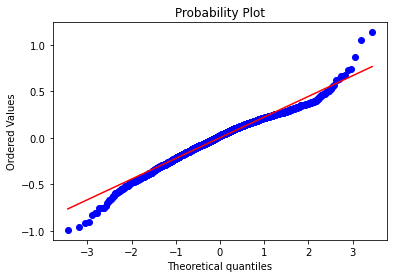

In [195]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [196]:
# Shipiro test for normality
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9815555214881897, pvalue=3.628552164927984e-17)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test. Strictly speaking, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal. So, the assumption is satisfied.

In [197]:
# goldfeldquandt test for homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 0.997979328553367), ('p-value', 0.5139356829863432)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model

In [198]:
# Let's write the equation of linear regression
Equation = "Used Phone Price ="
print(Equation, end=" ")
for i in range(len(X_train4.columns)):
    if i == 0:
        print(np.round(olsmod2.params[i], 4), "+", end=" ")
    elif i != len(X_train4.columns) - 1:
        print(
            "(",
            np.round(olsmod2.params[i], 4),
            ")*(",
            X_train4.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print("(", np.round(olsmod2.params[i], 4), ")*(", X_train4.columns[i], ")")

Used Phone Price = 1.0953 + ( 0.0461 )*( screen_size ) +  ( 0.0219 )*( main_camera_mp ) +  ( 0.0165 )*( selfie_camera_mp ) +  ( 0.0006 )*( int_memory ) +  ( 0.0013 )*( weight ) +  ( 0.3941 )*( normalized_new_price ) +  ( 0.0496 )*( brand_name_Asus ) +  ( -0.1297 )*( brand_name_Celkon ) +  ( 0.2792 )*( brand_name_Infinix ) +  ( 0.117 )*( brand_name_Microsoft ) +  ( 0.054 )*( brand_name_Nokia ) +  ( 0.0579 )*( brand_name_Xiaomi ) +  ( 0.0432 )*( 4g_yes )


In [204]:
# Performing predictions on the test set
pred = olsmod2.predict(X_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(20, random_state=1)

,Actual,Predicted
1174,4.553772,4.466459
2247,4.330996,4.104755
2991,4.180828,3.989298
2997,4.291007,4.280959
2982,4.649761,4.625336
479,4.284689,4.192233
17,4.777020,4.812072
471,4.721886,4.428373
2918,4.482550,4.514520
602,3.852485,4.110957


Let's visualize these results

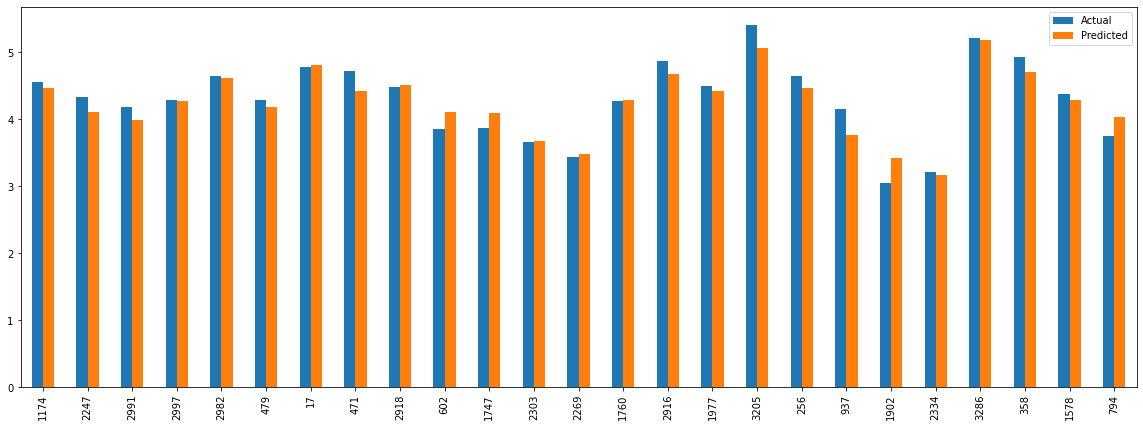

In [200]:
df2 = df_pred_test.sample(25, random_state=1)
df2.plot(kind="bar", figsize=(20, 7))
plt.show()

#### Let's check the model performance on train set 

In [201]:
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.224043,0.176755,0.842634,0.841717,4.148545


#### Checking model performance on test set 

In [202]:
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.224399,0.180026,0.838469,0.836256,4.197325


In [203]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     989.8
Date:                   Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                           13:38:11   Log-Likelihood:                 186.05
No. Observations:                   2417   AIC:                            -344.1
Df Residuals:                       2403   BIC:                            -263.0
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Actionable Insights and Recommendations 

### Insights
- The linear correlation between normalized_used_price & normalized_new_price when performing exploratory data analysis was found to be strongly positive with a value of 0.83. This reafirms the model validity.
- The screen_size, selfie_camera, and int_memory are significant parameters. As these attributes increase, the normalized_used_price, and by default used_price is expected to increase. This evidence is indicated by the positive coefficients for these parameters predicted by the model.
- After performing data processing, we note that manufacturers producing expensive brands have the maximum number of used phones with large screen_size and better selfie_camera. Brands that are cheaper have the least number of used phones.
- Amidst having moderately positive correlation between the weight of the phone and battery as the battery size increases, the phone's weight and battery have been found to not have significant factors in predicting the normalized_used_price.
- Though insignificant, the RAM for the used phones was found have a constant value of ~4GB on average across the dataset. 
- Similarly, approximately 90% of phones were found to be operating using the Android os. However, this doesn't affect the price prediction.
- We have a train mae of 0.176081 and test mae of 0.180888. These values suggests that there is no overfitting in the model.
- The linear predictive model is able to predict the normalized_used_price of the phone, explaining approximately 84% of the variance in the data, within a mean absolute percentage error of approximately 4.2%. This indicates that we have built a good model.

### Business Recommendations
- The EDA gave us an insight into how the different features of a phone may have an impact on the used price of the phone. The ML model indicated which of these features are expected to be significant and which ones are insignificant. Being able to predict the used_price of a phone will guide the business into making price effective purchase and sales strategy to increase revenue.
- The supply/stock of used phones as well as demand/popularity in the market are other data points which need to be studied and possibly taken into consideration as the dynamic ML pricing model is refined and retrained. 
- Lastly, the other important factor the business should consider is the prices offered by competition is another important predictor to be taken into consideration.
- 5g network enabled phones have a high resale price and should be focused on. I would also recommend the discontinuation used phones such as Gionee.
- In the future, more data ought to be collected on the age of customers purchasing products, since age could be a major drive especially for millenial customers as they may tend to want a 5g or a newer version.

___